In [363]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/Colab Notebooks/opencv/imagenes/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.path.dirname('imagenes/') + "/"

In [364]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (8, 5.0) # this controls figure size in the notebook


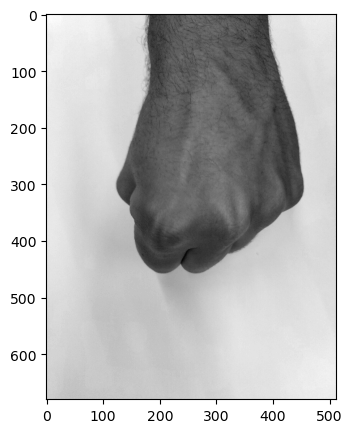

In [365]:
piedra = cv.imread(data_dir + "piedra.jpg")
piedra= cv.resize(piedra,(512,680))
img = piedra[:, :, 0]

ret,thpiedra = cv.threshold(img,255,255,255)
# thpiedra=th[:,:,2]
plt.imshow(thpiedra,cmap='gray')

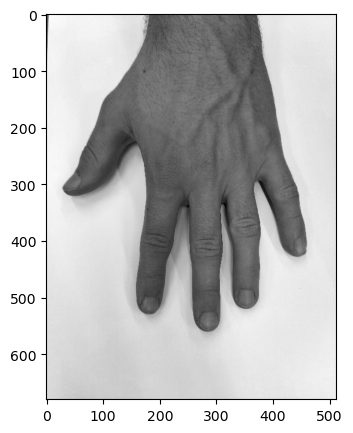

In [366]:
papel = cv.imread(data_dir + "papel.jpg")
papel= cv.resize(papel,(512,680))
img = papel[:, :, 0]
ret,thpapel = cv.threshold(img,255,255,255)
# thpiedra=th[:,:,2]
plt.imshow(thpapel,cmap='gray')

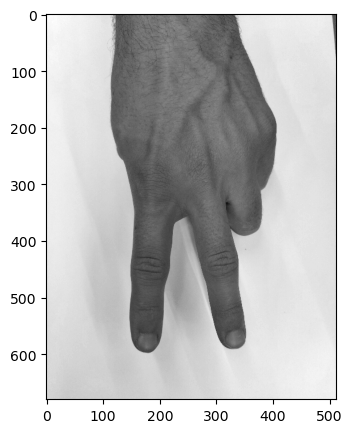

In [367]:
tijera = cv.imread(data_dir + "tijera.jpg")
tijera= cv.resize(tijera,(512,680))
img = tijera[:, :, 0]
ret,thtijera = cv.threshold(img,255,255,255)
# thpiedra=th[:,:,2]
plt.imshow(thtijera,cmap='gray')

Text(0.5, 1.0, 'Limpio')

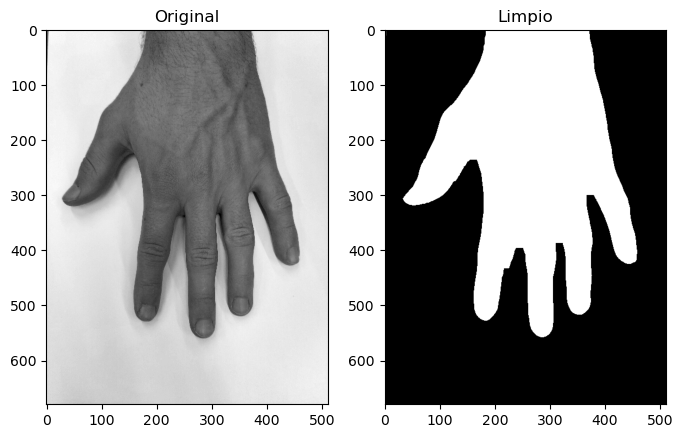

In [368]:
kernel = np.ones((5,5),np.uint8)
src_manos = cv.GaussianBlur(src=thpapel, ksize=(5,5), sigmaX=0, sigmaY=0)

ret1,src_monedas_binary = cv.threshold(src_manos,115,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_binary, cv.MORPH_CLOSE, kernel, iterations=2)
src_monedas_clean = cv.morphologyEx(src_monedas_clean, cv.MORPH_OPEN, kernel, iterations=1)
erosionpapel = cv.erode(src_monedas_clean,kernel,iterations=1)
fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(thpapel,cmap="gray")
ax1.set_title("Original")
ax2.imshow(erosionpapel,cmap="gray")
ax2.set_title("Limpio")

Text(0.5, 1.0, 'Limpio')

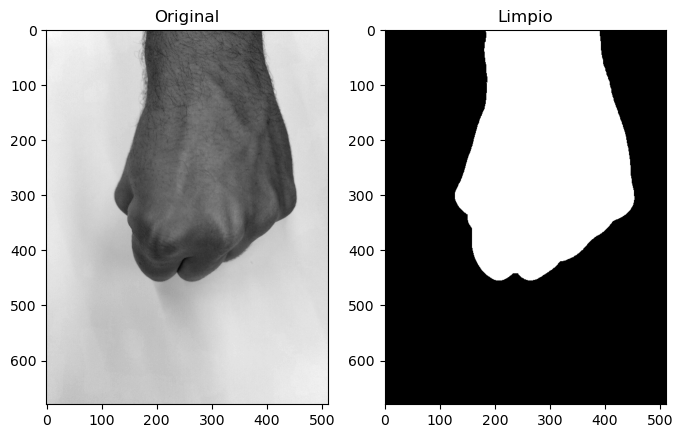

In [369]:
kernel = np.ones((5,5),np.uint8)
src_manos = cv.GaussianBlur(src=thpiedra, ksize=(5,5), sigmaX=0, sigmaY=0)

ret1,src_monedas_binary = cv.threshold(src_manos,115,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_binary, cv.MORPH_CLOSE, kernel, iterations=1)
src_monedas_clean = cv.morphologyEx(src_monedas_clean, cv.MORPH_OPEN, kernel, iterations=1)
erosionpiedra = cv.erode(src_monedas_clean,kernel,iterations=1)
fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(thpiedra,cmap="gray")
ax1.set_title("Original")
ax2.imshow(erosionpiedra,cmap="gray")
ax2.set_title("Limpio")

Text(0.5, 1.0, 'Limpio')

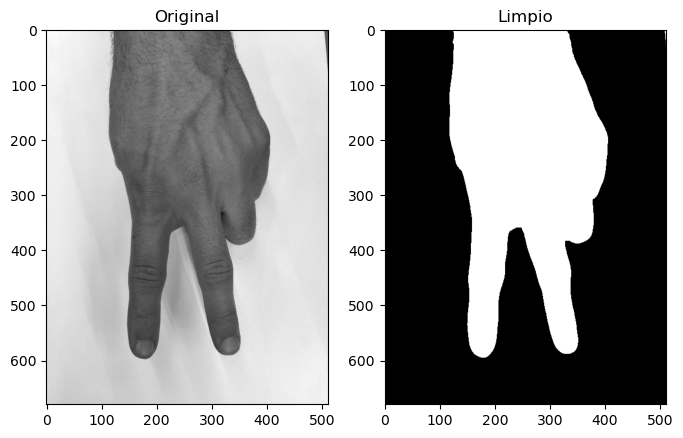

In [370]:
kernel = np.ones((5,5),np.uint8)
src_manos = cv.GaussianBlur(src=thtijera, ksize=(5,5), sigmaX=0, sigmaY=0)

ret1,src_monedas_binary = cv.threshold(src_manos,115,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_binary, cv.MORPH_CLOSE, kernel, iterations=1)
src_monedas_clean = cv.morphologyEx(src_monedas_clean, cv.MORPH_OPEN, kernel, iterations=1)
erosiontijera = cv.erode(src_monedas_clean,kernel,iterations=1)
fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(thtijera,cmap="gray")
ax1.set_title("Original")
ax2.imshow(erosiontijera,cmap="gray")
ax2.set_title("Limpio")

Text(0.5, 1.0, 'Limpio')

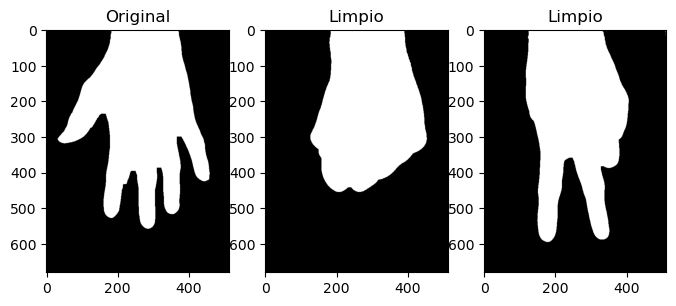

In [371]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(erosionpapel,cmap="gray")
ax1.set_title("Original")
ax2.imshow(erosionpiedra,cmap="gray")
ax2.set_title("Limpio")
ax3.imshow(erosiontijera,cmap="gray")
ax3.set_title("Limpio")

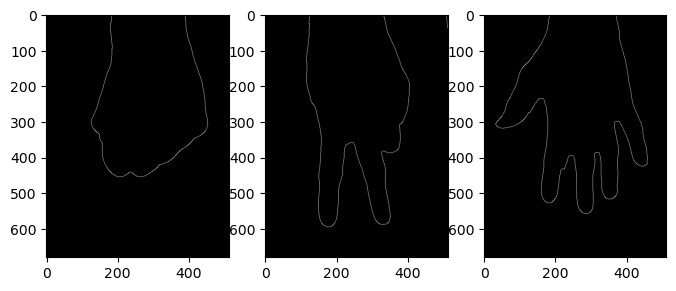

In [372]:
umbral_minimo = 50
umbral_maximo = 100
cnpiedra = cv.Canny(erosionpiedra, umbral_minimo, umbral_maximo)
cntijera = cv.Canny(erosiontijera, umbral_minimo, umbral_maximo)
cnpapel = cv.Canny(erosionpapel, umbral_minimo, umbral_maximo)
fig,(ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(cnpiedra,cmap="gray")
ax2.imshow(cntijera,cmap="gray")
ax3.imshow(cnpapel,cmap="gray")

1
Centro: 298, 385
Área: 123.0  Perímetro: 2375.2631853818893


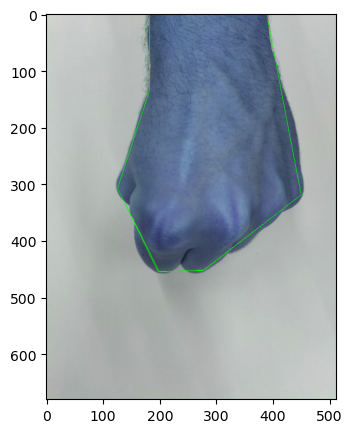

In [373]:

1
contornos, jerarquia = cv.findContours(cnpiedra.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
for cnt in range(len(contornos)):
  cnt = contornos[cnt]
  M = cv.moments(cnt)
  if M['m00'] != 0:
    cx = int(M["m10"]/M['m00'])
    cy = int(M["m01"]/M['m00'])
    print(f"Centro: {cx}, {cy}")
    # cv.circle(piedra, (cx, cy), 5, (255, 0, 0), 2)
    # cv.putText(piedra,f'{area}',(cx, cy),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2,cv.LINE_AA)
  area = cv.contourArea(cnt)
  perimetro = cv.arcLength(cnt, True)
  print(f"Área: {area}  Perímetro: {perimetro}")
  (x,y),radius = cv.minEnclosingCircle(cnt)
  # cv.circle(piedra, (int(x), int(y)), int(radius), (0,0,255), 2)

  approx = cv.approxPolyDP(cnt, 0.01*perimetro, True )
  cv.drawContours(piedra, [approx], -1, (0,255,0), 1)
plt.imshow(piedra)


2
Área: 0.0  Perímetro: 81.31370830535889
Centro: 281, 413
Área: 45.0  Perímetro: 3783.8317252397537


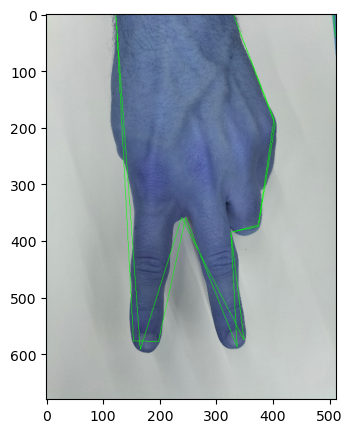

In [374]:

1
contornos, jerarquia = cv.findContours(cntijera.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
for cnt in range(len(contornos)):
  cnt = contornos[cnt]
  M = cv.moments(cnt)
  if M['m00'] != 0:
    cx = int(M["m10"]/M['m00'])
    cy = int(M["m01"]/M['m00'])
    print(f"Centro: {cx}, {cy}")
    # cv.circle(piedra, (cx, cy), 5, (255, 0, 0), 2)
    # cv.putText(tijera,f'{area}',(cx, cy),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2,cv.LINE_AA)
  area = cv.contourArea(cnt)
  perimetro = cv.arcLength(cnt, True)
  print(f"Área: {area}  Perímetro: {perimetro}")
  (x,y),radius = cv.minEnclosingCircle(cnt)
  # cv.circle(tijera, (int(x), int(y)), int(radius), (0,0,255), 2)

  approx = cv.approxPolyDP(cnt, 0.01*perimetro, True )
  cv.drawContours(tijera, [approx], -1, (0,255,0), 1)
plt.imshow(tijera)


2
Centro: 175, 316
Área: 137.5  Perímetro: 4903.617646217346
Área: 0.0  Perímetro: 70.82842707633972


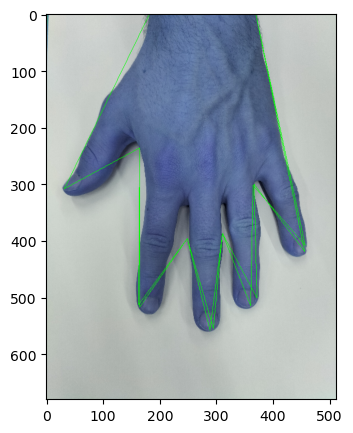

In [375]:
1
contornos, jerarquia = cv.findContours(cnpapel.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
for cnt in range(len(contornos)):
  cnt = contornos[cnt]
  M = cv.moments(cnt)
  if M['m00'] != 0:
    cx = int(M["m10"]/M['m00'])
    cy = int(M["m01"]/M['m00'])
    print(f"Centro: {cx}, {cy}")
    # cv.circle(piedra, (cx, cy), 5, (255, 0, 0), 2)
    # cv.putText(papel,f'{area}',(cx, cy),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2,cv.LINE_AA)
  area = cv.contourArea(cnt)
  perimetro = cv.arcLength(cnt, True)
  print(f"Área: {area}  Perímetro: {perimetro}")
  (x,y),radius = cv.minEnclosingCircle(cnt)
  # cv.circle(tijera, (int(x), int(y)), int(radius), (0,0,255), 2)

  approx = cv.approxPolyDP(cnt, 0.01*perimetro, True )
  cv.drawContours(papel, [approx], -1, (0,255,0), 1)
plt.imshow(papel)